# Autocorrelation
| Author  | Stanley A. Baronett |
|---------|---------------------|
| Created | 10/27/2021          |
| Updated | 11/10/2022          |

## **Figure 4.**

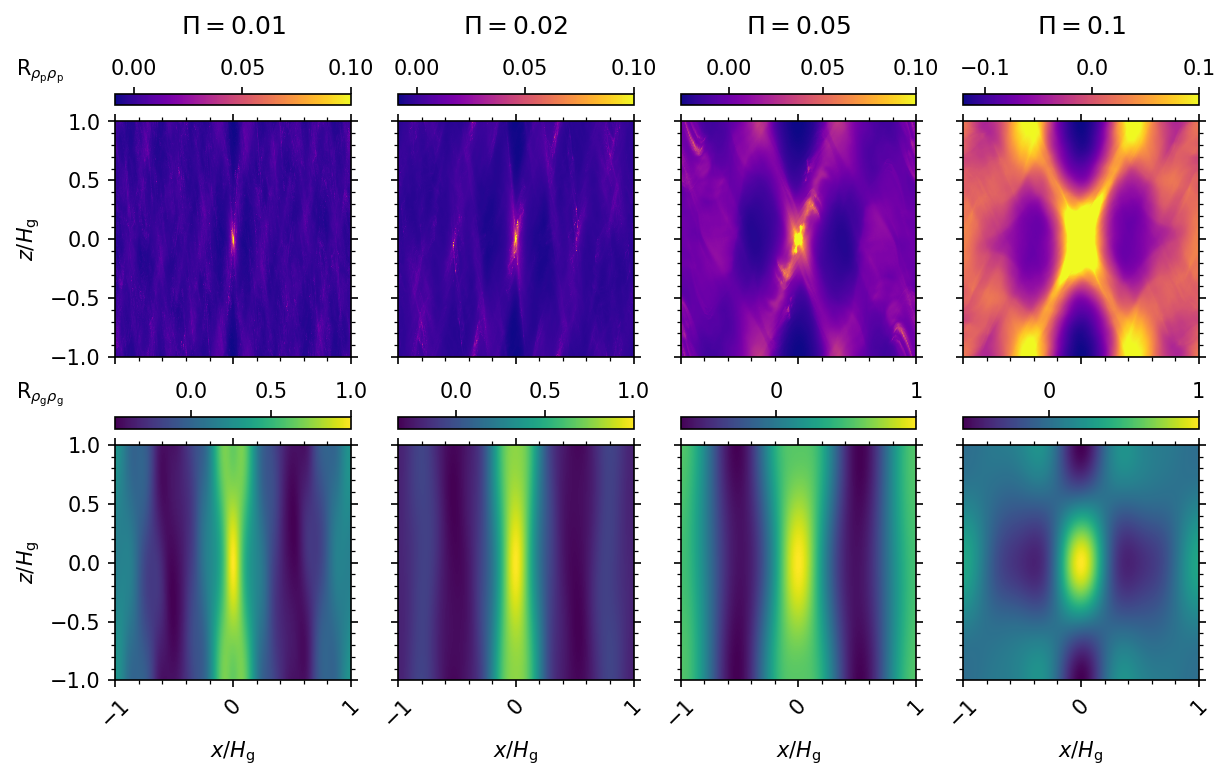

In [11]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack

mpl.rcParams["axes.formatter.offset_threshold"] = 2
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(9.32, 5.6),
                        dpi=150)
workdir = '../unstrat'
case = 'BA'
Pis = ['0.01', '0.02', '0.05', '0.10']
res = 2048

for i, Pi in enumerate(Pis):
    # Collect parameters
    path = f'{workdir}/{case}/{Pi}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    epsilon = athinput['problem']['epsilon']
    H_g = c_s/Omega
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00200.athdf')
    xv, zv = data['x1v']/H_g, data['x2v']/H_g

    # Process dust
    diff = data['rhop'][0] - epsilon
    ft = fftpack.fft2(diff)
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    clip = np.clip(shift, float('-inf'), 0.1)
    rhops = axs[0][i].pcolormesh(xv, zv, clip, cmap='plasma')

    # Process gas
    diff = data['rho'][0] - 1
    ft = fftpack.fft2(diff)
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    rhogs = axs[1][i].pcolormesh(xv, zv, shift)

    # Add and format color bars, titles, and x-axis labels
    cb_rhop = fig.colorbar(rhops, ax=axs[0][i], location='top')
    cb_rhog = fig.colorbar(rhogs, ax=axs[1][i], location='top')
    axs[0][i].set_title(f'$\Pi={float(Pi)}$', pad=42)
    axs[0][i].set(aspect='equal')
    axs[1][i].set(xlabel=r'$x/H_\mathrm{g}$', aspect='equal')

for ax in axs.flat:
    ax.label_outer()
    ax.minorticks_on()
    ax.set(aspect='equal')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.tick_params(axis='x', labelrotation=45)

# Format and save figure
axs[0][0].text(-0.42, 1.27,
               r'$\mathrm{R}_{\rho_\mathrm{p}\rho_\mathrm{p}}$',
               ha='left', va='top', transform=axs[0][0].transAxes)
axs[1][0].text(-0.42, 1.27,
               r'$\mathrm{R}_{\rho_\mathrm{g}\rho_\mathrm{g}}$',
               ha='left', va='top', transform=axs[1][0].transAxes)
axs[0][0].set(ylabel=r'$z/H_\mathrm{g}$')
axs[1][0].set(ylabel=r'$z/H_\mathrm{g}$')
plt.subplots_adjust(hspace=0)
# plt.savefig(f'figs/{case}_Rs.png', dpi=800, bbox_inches='tight',
#             pad_inches=0.01)
plt.show()

## **Figure 6.**

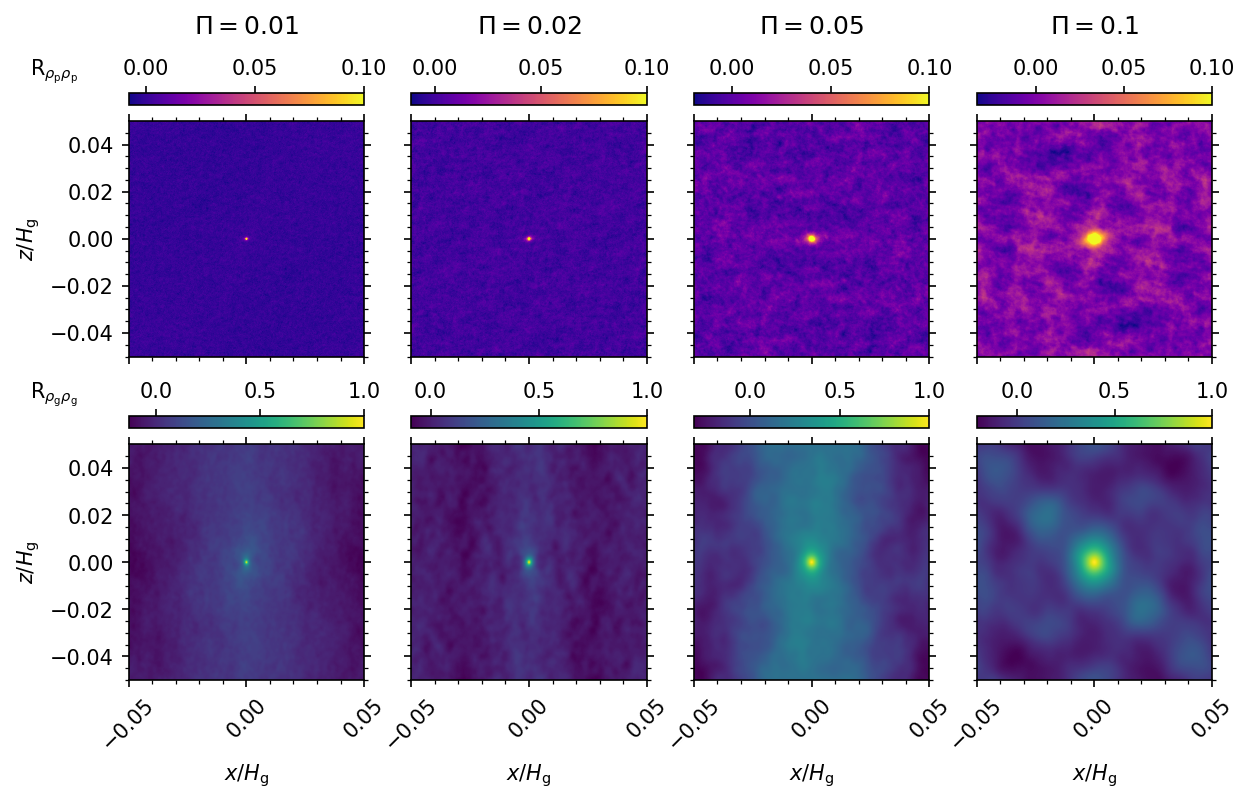

In [12]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack

mpl.rcParams["axes.formatter.offset_threshold"] = 2
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(9.32, 5.6),
                        dpi=150)
workdir = '../unstrat'
case = 'AB'
Pis = ['0.01', '0.02', '0.05', '0.10']
res = 2048

for i, Pi in enumerate(Pis):
    # Collect parameters
    path = f'{workdir}/{case}/{Pi}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    epsilon = athinput['problem']['epsilon']
    H_g = c_s/Omega
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xv, zv = data['x1v']/H_g, data['x2v']/H_g

    # Process dust
    diff = data['rhop'][0] - epsilon
    ft = fftpack.fft2(diff)
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    clip = np.clip(shift, float('-inf'), 0.1)
    rhops = axs[0][i].pcolormesh(xv, zv, clip, cmap='plasma')

    # Process gas
    diff = data['rho'][0] - 1
    ft = fftpack.fft2(diff)
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    rhogs = axs[1][i].pcolormesh(xv, zv, shift)

    # Add and format color bars, titles, and x-axis labels
    cb_rhop = fig.colorbar(rhops, ax=axs[0][i], location='top')
    cb_rhog = fig.colorbar(rhogs, ax=axs[1][i], location='top')
    axs[0][i].set_title(f'$\Pi={float(Pi)}$', pad=42)
    axs[0][i].set(aspect='equal')
    axs[1][i].set(xlabel=r'$x/H_\mathrm{g}$', aspect='equal')

for ax in axs.flat:
    ax.label_outer()
    ax.minorticks_on()
    ax.set(aspect='equal')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.tick_params(axis='x', labelrotation=45)

# Format and save figure
axs[0][0].text(-0.42, 1.27,
               r'$\mathrm{R}_{\rho_\mathrm{p}\rho_\mathrm{p}}$',
               ha='left', va='top', transform=axs[0][0].transAxes)
axs[1][0].text(-0.42, 1.27,
               r'$\mathrm{R}_{\rho_\mathrm{g}\rho_\mathrm{g}}$',
               ha='left', va='top', transform=axs[1][0].transAxes)
axs[0][0].set(ylabel=r'$z/H_\mathrm{g}$')
axs[1][0].set(ylabel=r'$z/H_\mathrm{g}$')
plt.subplots_adjust(hspace=0)
# plt.savefig(f'figs/{case}_Rs.png', dpi=800, bbox_inches='tight',
#             pad_inches=0.01)
plt.show()

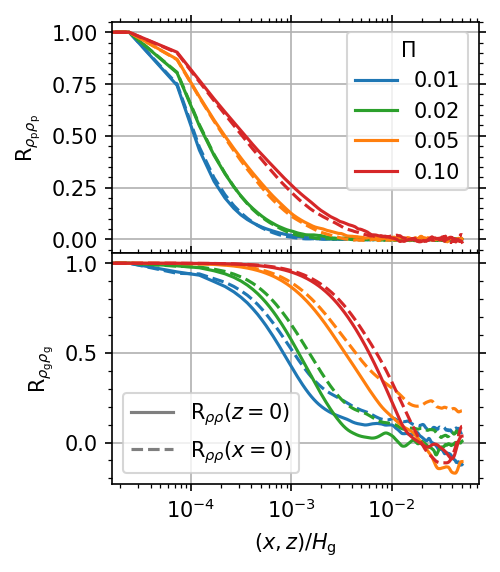

In [3]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack

fig, axs = plt.subplots(2, sharex=True, figsize=(3.15, 4), dpi=150)
workdir = '../unstrat'
case = 'AB'
Pis = [['0.01', 'tab:blue'], ['0.02', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.10', 'tab:red']]
res = 2048

for i, Pi in enumerate(Pis):
    # Collect parameters and plot densities
    # print(f'{case}/{Pi[0]}: Processing...', flush=True)
    path = f'{workdir}/{case}/{Pi[0]}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    epsilon = athinput['problem']['epsilon']
    H_g = c_s/Omega
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xv, zv = data['x1v']/H_g, data['x2v']/H_g
    x0, z0 = len(xv)//2, len(zv)//2

    # Process dust
    diff = data['rhop'][0] - epsilon
    ft = fftpack.fft2(diff)
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    axs[0].semilogx(xv, shift[z0], color=Pi[1], label=Pi[0])
    axs[0].semilogx(xv, shift[:, x0], color=Pi[1], ls='--')

    # Process gas
    diff = data['rho'][0] - 1
    ft = fftpack.fft2(diff)
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    axs[1].semilogx(xv, shift[x0], color=Pi[1])
    axs[1].semilogx(xv, shift[:, z0], color=Pi[1], ls='--')
    # print(f'\tdone.', flush=True)

    # Plot ghost points for colorless line style and add legends
    ls_dust, = axs[1].semilogx([], [], color='tab:gray',
                               label=r'$\mathrm{R}_{\rho\rho}(z=0$)')
    ls_gas,  = axs[1].semilogx([], [], color='tab:gray', ls='--',
                               label=r'$\mathrm{R}_{\rho\rho}(x=0)$')
    axs[0].legend(loc='upper right', title=r'$\Pi$')
    axs[1].legend(handles=[ls_dust, ls_gas], loc='lower left')
    
for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)

# Format and save figure
axs[0].set(ylabel=r'$\mathrm{R}_{\rho_\mathrm{p}\rho_\mathrm{p}}$')
axs[1].set(xscale='log', xlabel=r'$(x,z)/H_\mathrm{g}$',
           ylabel=r'$\mathrm{R}_{\rho_\mathrm{g}\rho_\mathrm{g}}$')
plt.subplots_adjust(hspace=0)
# plt.savefig(f'figs/{case}_avgRs-z0-x0.pdf', bbox_inches='tight', pad_inches=0.01)
plt.show()

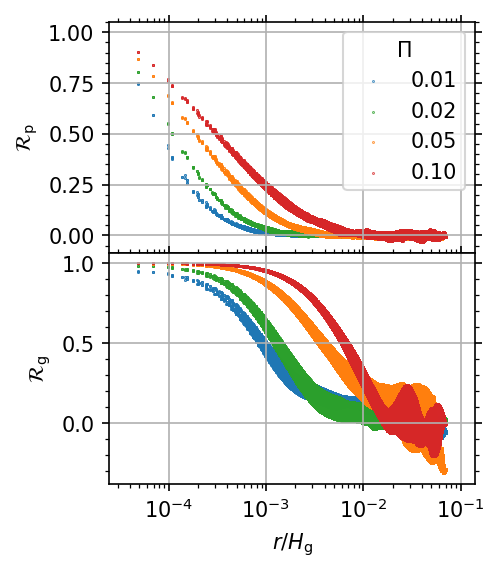

In [4]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack

def norms(xv, zv, pole):
    rv = np.zeros((len(zv), len(xv)))
    for i, z in enumerate(zv):
        for j, x in enumerate(xv):
            rv[i][j] = np.sqrt((x - pole[0])**2 + (z - pole[1])**2)
    return rv

fig, axs = plt.subplots(2, sharex=True, figsize=(3.15, 4), dpi=150)
workdir = '../unstrat'
case = 'AB'
Pis = [['0.01', 'tab:blue'], ['0.02', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.10', 'tab:red']]
res = 2048

for i, Pi in enumerate(Pis):
    # Collect parameters and plot densities
    # print(f'{case}/{Pi[0]}: Processing...', flush=True)
    path = f'{workdir}/{case}/{Pi[0]}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    epsilon = athinput['problem']['epsilon']
    H_g = c_s/Omega
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xv, zv = data['x1v']/H_g, data['x2v']/H_g
    left, right = xv[-1]/res, np.sqrt(8)*xv[-1]
    x0, z0 = len(xv)//2, len(zv)//2
    pole = (xv[x0], zv[z0])
    rv = norms(xv, zv, pole)

    # Process dust
    diff = data['rhop'][0] - epsilon
    ft = fftpack.fft2(diff)
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    axs[0].scatter(rv, shift, s=0.1, color=Pi[1], label=Pi[0])
    
    # Process gas
    diff = data['rho'][0] - 1
    ft = fftpack.fft2(diff)
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    axs[1].scatter(rv, shift, s=0.1, color=Pi[1])
    # print(f'\tdone.', flush=True)

for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)

# Format and save figure
axs[0].legend(loc='upper right', title=r'$\Pi$')
axs[0].set(ylabel=r'$\mathcal{R}_\mathrm{p}$')
axs[1].set(xlim=(left, right), xscale='log', #ylim=(-9e3, 0.5)
           xlabel=r'$r/H_\mathrm{g}$',
           ylabel=r'$\mathcal{R}_\mathrm{g}$')
plt.subplots_adjust(hspace=0)
# plt.savefig(f'figs/{case}_Rs_pow-spect.png', bbox_inches='tight', pad_inches=0.01)
plt.show()

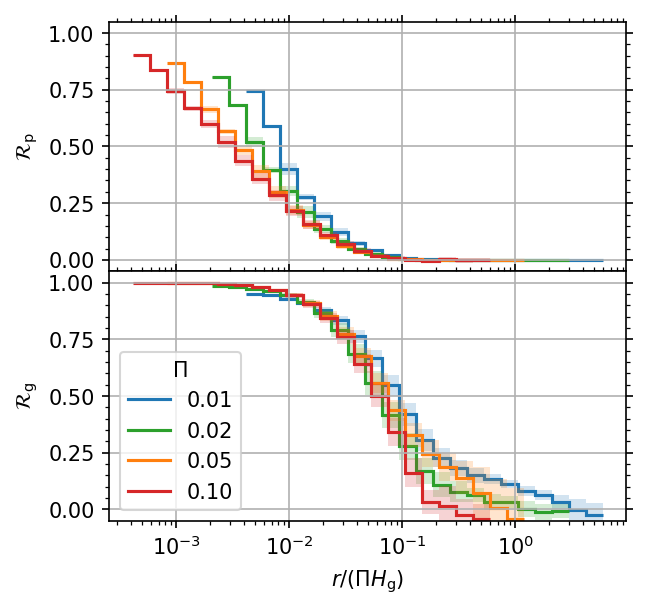

In [7]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack, stats

def norms(xv, zv, pole):
    rv = np.zeros((len(zv), len(xv)))
    for i, z in enumerate(zv):
        for j, x in enumerate(xv):
            rv[i][j] = np.sqrt((x - pole[0])**2 + (z - pole[1])**2)
    return rv

fig, axs = plt.subplots(2, sharex=True, figsize=(4.45, 4.32), dpi=150)
workdir = '../unstrat'
case = 'AB'
Pis = [['0.01', 'tab:blue'], ['0.02', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.10', 'tab:red']]
res = 2048

for i, Pi in enumerate(Pis):
    # Collect parameters
    # print(f'{case}/{Pi[0]}: Processing...', flush=True)
    path = f'{workdir}/{case}/{Pi[0]}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    epsilon = athinput['problem']['epsilon']
    H_g = c_s/Omega
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xv, zv = data['x1v']/H_g, data['x2v']/H_g
    x0, z0 = len(xv)//2, len(zv)//2
    pole = (xv[x0], zv[z0])
    rv = norms(xv, zv, pole).ravel()
    indices = np.where(rv > xv[-1])[0]
    indices = np.append(indices, np.where(rv == 0)[0])
    rv = np.delete(rv, indices)
    r0 = xv[x0]
    base = np.sqrt(2)
    leftmost_edge = r0/np.sqrt(base)
    num = int(np.sqrt(res))
    bin_edges = leftmost_edge*np.logspace(0, num, num=(num + 1), base=base)

    # Process dust
    diff = data['rhop'][0] - epsilon
    ft = fftpack.fft2(diff)
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    shift = np.delete(shift, indices).ravel()
    dust_means, bin_edges, binnumnber = stats.binned_statistic(rv, shift,
        statistic='mean', bins=bin_edges)
    dust_stds, bin_edges, binnumnber = stats.binned_statistic(rv, shift,
        statistic='std', bins=bin_edges)
    dust_highs = dust_means + dust_stds
    dust_lows = dust_means - dust_stds

    # Process gas
    diff = data['rho'][0] - 1
    ft = fftpack.fft2(diff)
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    shift = np.delete(shift, indices).ravel()
    gas_means, bin_edges, binnumnber = stats.binned_statistic(rv, shift,
        statistic='mean', bins=bin_edges)
    gas_stds, bin_edges, binnumnber = stats.binned_statistic(rv, shift,
        statistic='std', bins=bin_edges)
    gas_highs = gas_means + gas_stds
    gas_lows = gas_means - gas_stds
    bin_counts, bin_edges, binnumnber = stats.binned_statistic(rv,
        rv, statistic='count', bins=bin_edges)

    # Plot histograms
    axs[0].stairs(dust_means, bin_edges/float(Pi[0]), baseline=float('-inf'),
                  color=Pi[1], lw=1.5)
    axs[0].stairs(dust_highs, bin_edges/float(Pi[0]), baseline=dust_lows,
                  fill=True, color=Pi[1], alpha=0.2)
    axs[1].stairs(gas_means, bin_edges/float(Pi[0]), baseline=float('-inf'),
                  color=Pi[1], lw=1.5, label=Pi[0])
    axs[1].stairs(gas_highs, bin_edges/float(Pi[0]), baseline=gas_lows,
                  fill=True, color=Pi[1], alpha=0.2)
    # print(f'\tdone.', flush=True)

for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)

# Format and save figure
axs[0].set(ylim=(-0.05, 1.05), ylabel=r'$\mathcal{R}_\mathrm{p}$')
axs[1].legend(loc='lower left', title=r'$\Pi$')
axs[1].set(ylim=(-0.05, 1.05), xscale='log', xlabel=r'$r/(\Pi H_\mathrm{g})$', 
           ylabel=r'$\mathcal{R}_\mathrm{g}$')
plt.subplots_adjust(hspace=0)
# plt.savefig(f'figs/{case}_Rs_rad-prof.pdf', bbox_inches='tight', pad_inches=0.01)
